In [14]:
from models.inference_pipeline import CCTAPipeline
from models.unet3D import UNet3D, dice_bce_loss
from models.net_utils import calculate_jaccard_score, calculate_dice_scores
import torch
from models.net_utils import get_best_device, calculate_dice_scores, calculate_overlap
from server_specific.server_utils import get_patients
from data.data_utils import get_preprocessed_patches, get_all_patches_with_certain_idx, combine_preprocessed_patches
import numpy as np
from data_generation.generate_3d import visualize3Dimage
import training_configuration
from training_utils import get_train_test_val_patches, get_val_test_indexes, test_or_validate_model

In [19]:
# trained_model_path = "saved_models/3d_model20241120-163318.pth"
# trained_model_path = "saved_models/3d_model20241124-104231.pth"

trained_model_path = "saved_models/3d_model_128_bce_fixed_2_dez.pth"
# trained_model_path = "saved_models/3d_model20241203-054252.pth"

# trained_model_path = "saved_models/3d_model20241204-084657.pth"

trained_model_path = "saved_models/3d_model20241205-005910.pth"
block_size = 128

In [20]:
device = get_best_device()

torch.set_default_device(device)
print(f"Using {device} device. Every tensor created will be by default on {device}")

model = UNet3D(in_channels=1, num_classes=1)

model.load_state_dict(torch.load(trained_model_path, weights_only=True))
model.to(device)
model.eval()

Using cuda device. Every tensor created will be by default on cuda


UNet3D(
  (down_convolution_1): DownSample(
    (conv): DoubleConv3D(
      (conv_op): Sequential(
        (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (1): ReLU(inplace=True)
        (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_convolution_2): DownSample(
    (conv): DoubleConv3D(
      (conv_op): Sequential(
        (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU(inplace=True)
        (3): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (4): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (5): ReLU(inplace=True)
      )
    )
    (pool): MaxP

In [21]:



print("-----INFERENCE_______")
# it would be better to do this with an inference pipeline

preprocessed_patches = get_preprocessed_patches(patches_folder = training_configuration.PATCHES_FOLDER)
val_idxs, test_idxs = get_val_test_indexes()
test_idxs_patches = get_all_patches_with_certain_idx(test_idxs, preprocessed_patches)

_, val_idxs_patches, test_idxs_patches = get_train_test_val_patches(patches_folder = training_configuration.PATCHES_FOLDER)

-----INFERENCE_______
amt of detected patch files:  22667
amt of detected_files:  1800
amt of patients:  800
validation patients: ['b123f9', 'a4ecdd', '90b0ce', '0f7854', '455ae2', 'aea921', '929f00', '86ab8c', '46db1c', '96061e', '01ce4b', 'bbb965', 'a20751', '718127', '5cf4e2', '82a93b', '4d0198', '72440a', 'a7f0b8', 'c4ed8e']
testing patients: ['abbb92', '34e2ad', '9b15fe', 'a21855', '482d96', '73475c', '62bfa2', '73daa9', '2d1007', 'aee484', '2c7d54', '3837e1', 'c22e1a', '888204', '768b84', '5480ab', '3c1528', 'aaf01d', '5e5c74', 'b7a568', '23c657', '3d34f1', '79bf08', '1c49f2', '188c1f', '48f89b', '8e4676', 'bcaf44', '43d244', '3bd625', '3b86df', '7559ca', '8d23cf', '9197e4', '28ac59', '392a52', '3055e0', '41e521', '501a4e', '6aac0c']
amt of detected patch files:  22667
amt of detected_files:  1800
amt of patients:  800
validation patients: ['b123f9', 'a4ecdd', '90b0ce', '0f7854', '455ae2', 'aea921', '929f00', '86ab8c', '46db1c', '96061e', '01ce4b', 'bbb965', 'a20751', '718127', '

In [22]:
block_size = 128

processing validation or test patient 0 / 40
(512, 512, 384)
dice scores: [np.float64(0.47926785024635155)]
overlap scores: [np.float64(0.7526004337119124)]


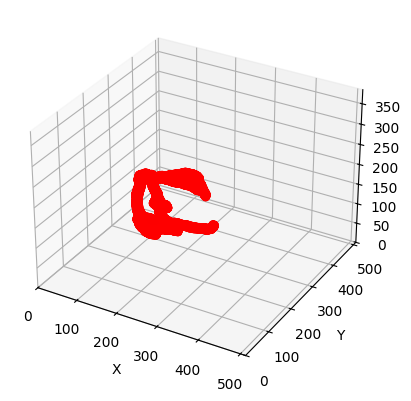

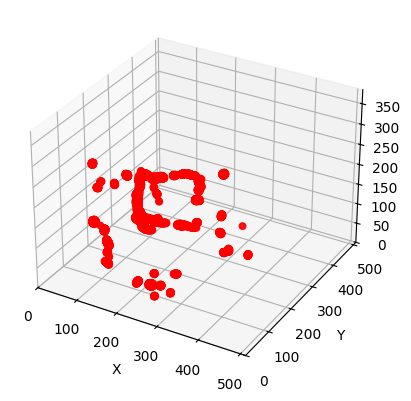

processing validation or test patient 1 / 40
(384, 384, 256)
dice scores: [np.float64(0.617278822268562)]
overlap scores: [np.float64(0.751172759624717)]


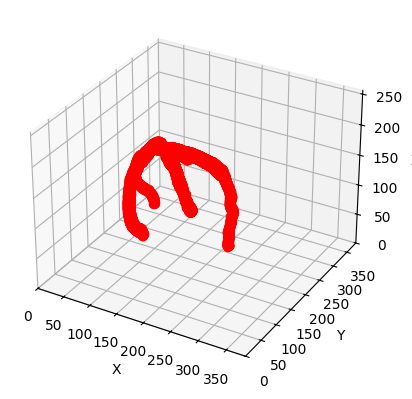

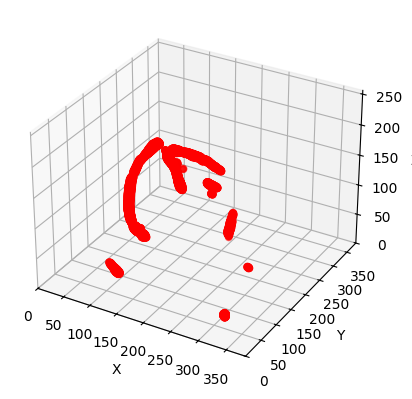

processing validation or test patient 2 / 40
(384, 384, 256)
dice scores: [np.float64(0.6477168048427424)]
overlap scores: [np.float64(0.8280325836727466)]


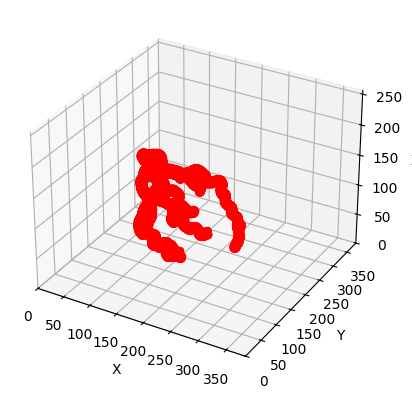

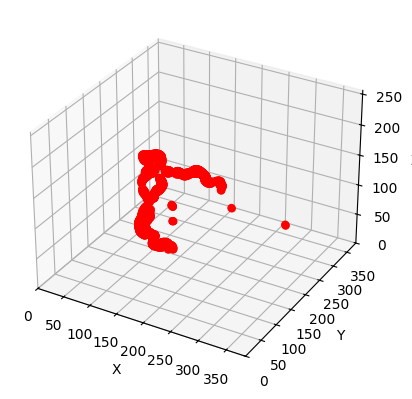

processing validation or test patient 3 / 40
(384, 384, 256)
dice scores: [np.float64(0.664110935837705)]
overlap scores: [np.float64(0.7683296903847379)]


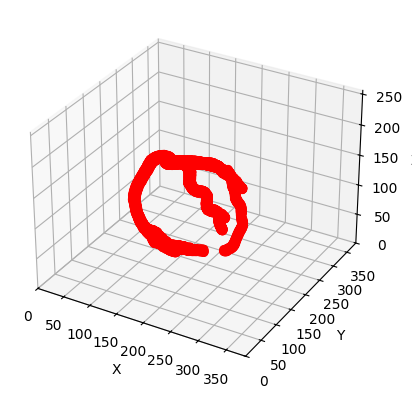

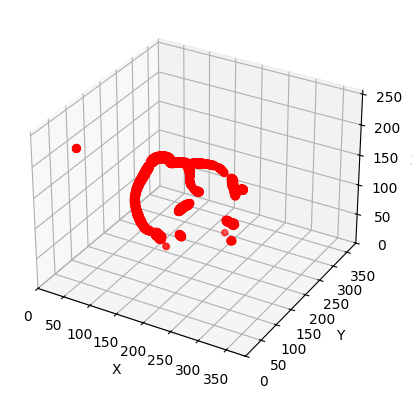

processing validation or test patient 4 / 40
(384, 384, 256)
dice scores: [np.float64(0.574468920563867)]
overlap scores: [np.float64(0.6956444951635692)]


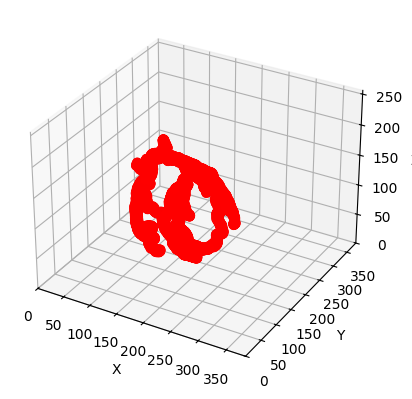

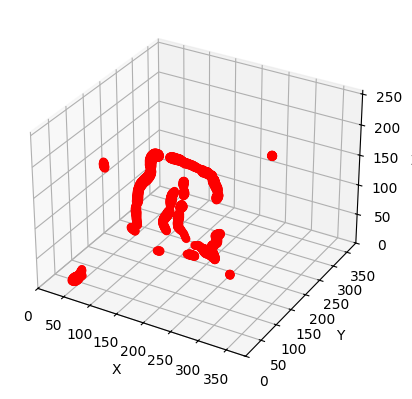

processing validation or test patient 5 / 40
(384, 384, 384)
dice scores: [np.float64(0.5211116175250383)]
overlap scores: [np.float64(0.8407209789023171)]


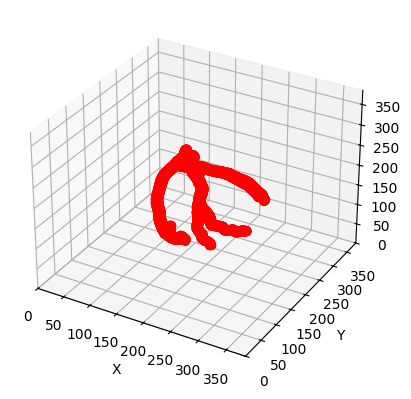

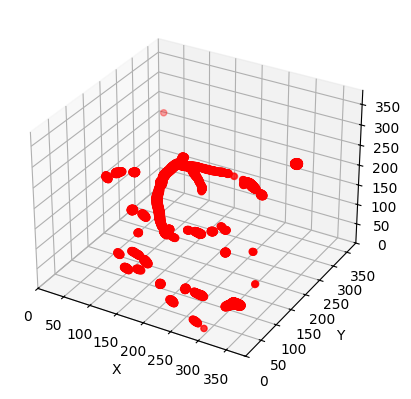

processing validation or test patient 6 / 40
(384, 384, 384)
dice scores: [np.float64(0.7284636651591995)]
overlap scores: [np.float64(0.8691183537943991)]


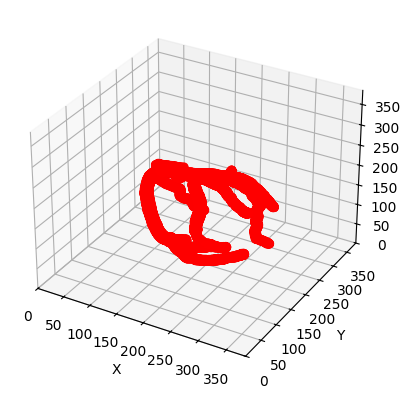

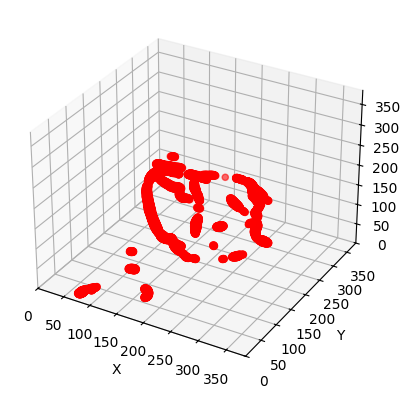

processing validation or test patient 7 / 40
(512, 512, 384)
dice scores: [np.float64(0.49494290057294305)]
overlap scores: [np.float64(0.7817742481608028)]


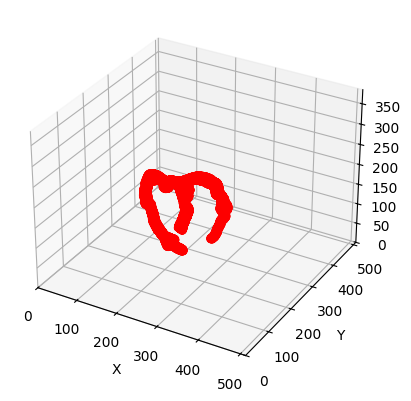

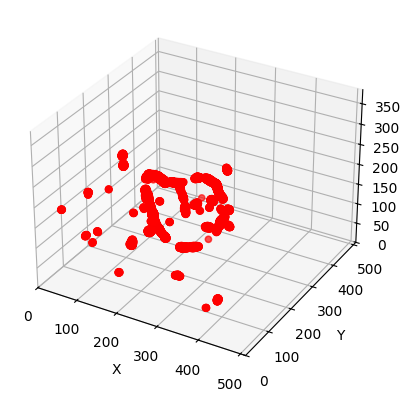

processing validation or test patient 8 / 40
(384, 384, 384)
dice scores: [np.float64(0.6658227331196276)]
overlap scores: [np.float64(0.8994373345101501)]


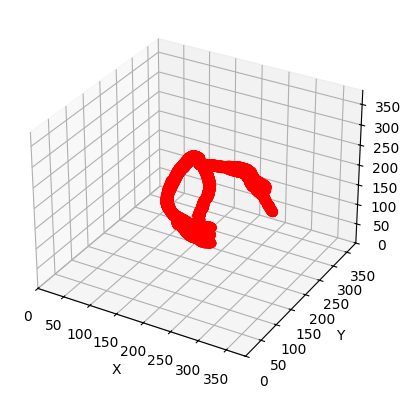

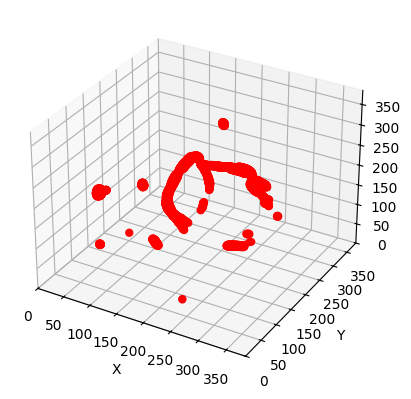

processing validation or test patient 9 / 40
(384, 384, 384)
dice scores: [np.float64(0.5730110053880546)]
overlap scores: [np.float64(0.8338616173833256)]


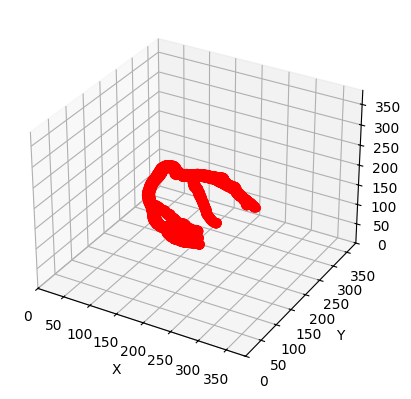

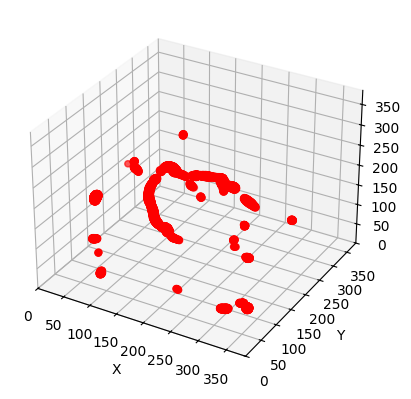

processing validation or test patient 10 / 40
(384, 384, 384)
dice scores: [np.float64(0.5322760791089445)]
overlap scores: [np.float64(0.8254986027638479)]


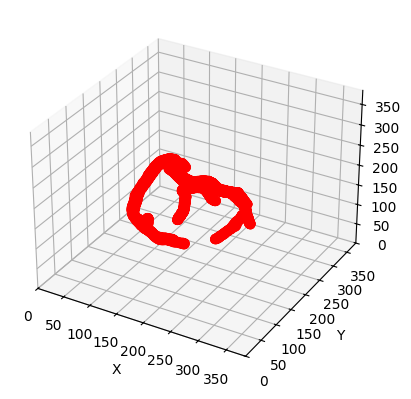

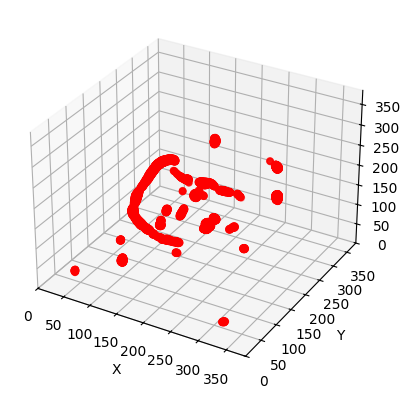

processing validation or test patient 11 / 40
(384, 384, 384)
dice scores: [np.float64(0.591321897073663)]
overlap scores: [np.float64(0.800206599875474)]


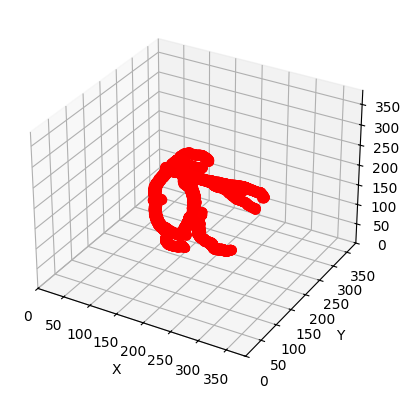

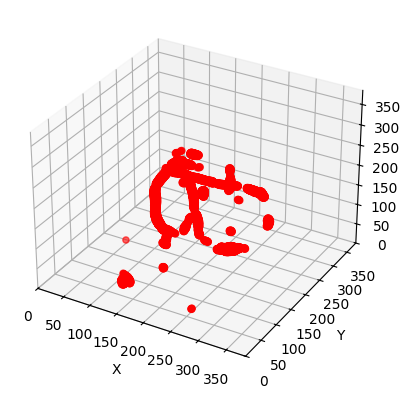

processing validation or test patient 12 / 40
(384, 384, 384)
dice scores: [np.float64(0.5280221161095753)]
overlap scores: [np.float64(0.8754427215095687)]


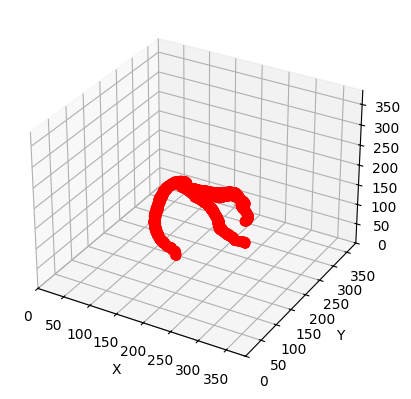

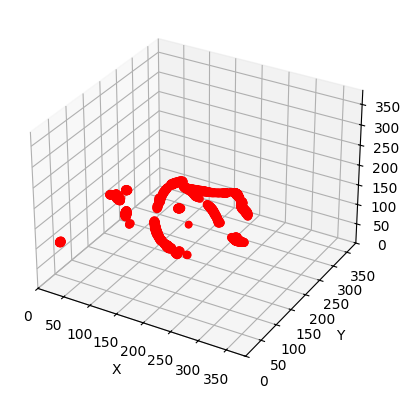

processing validation or test patient 13 / 40
(384, 384, 256)
dice scores: [np.float64(0.6789034155556987)]
overlap scores: [np.float64(0.7752753897950512)]


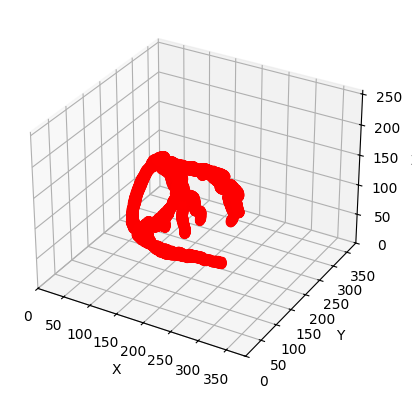

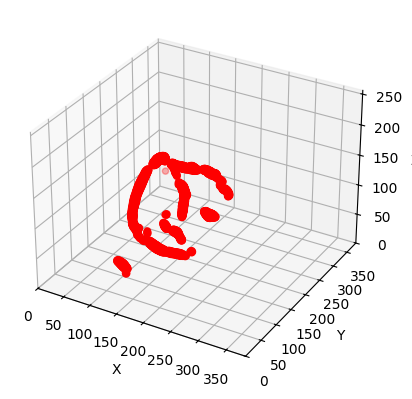

processing validation or test patient 14 / 40
(384, 384, 256)
dice scores: [np.float64(0.5786315461346634)]
overlap scores: [np.float64(0.7926594926979247)]


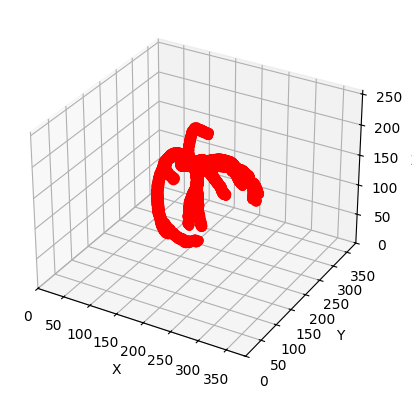

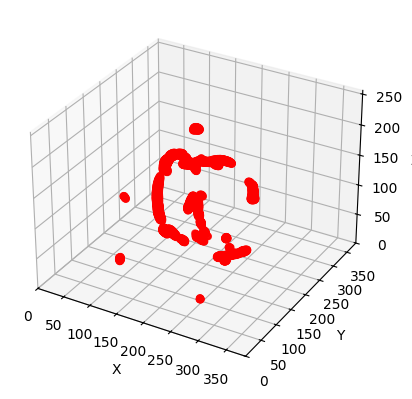

processing validation or test patient 15 / 40
(384, 384, 384)
dice scores: [np.float64(0.6570062346423766)]
overlap scores: [np.float64(0.8574042932040756)]


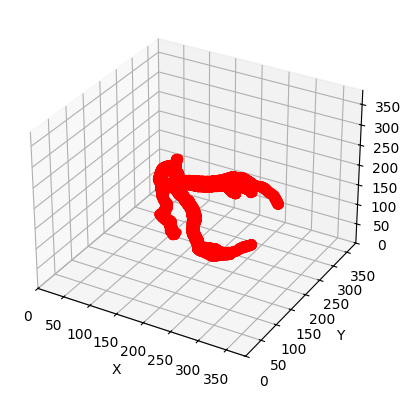

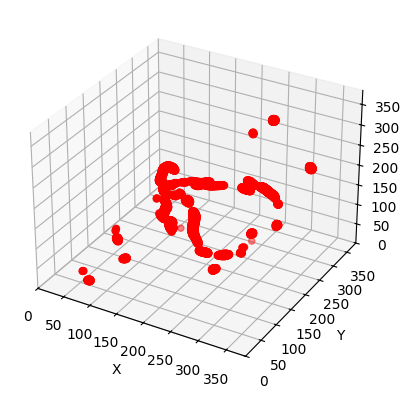

processing validation or test patient 16 / 40
(384, 384, 384)
dice scores: [np.float64(0.5376873777703338)]
overlap scores: [np.float64(0.8110658661276899)]


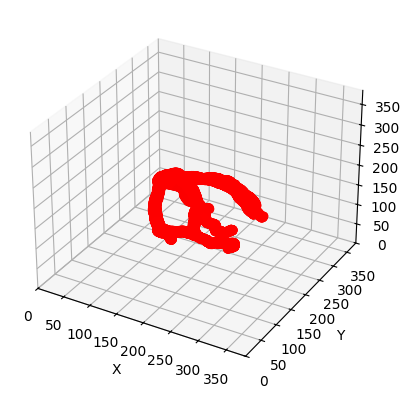

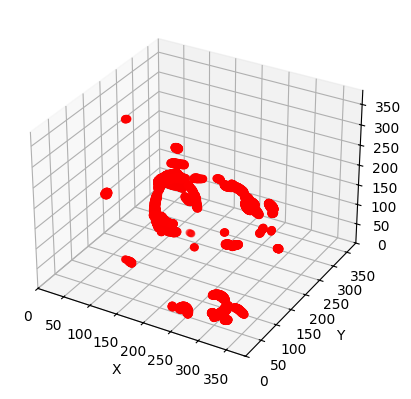

processing validation or test patient 17 / 40
(384, 384, 384)
dice scores: [np.float64(0.5912076502321102)]
overlap scores: [np.float64(0.7517986988136242)]


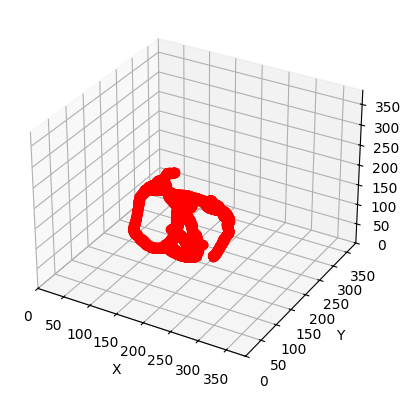

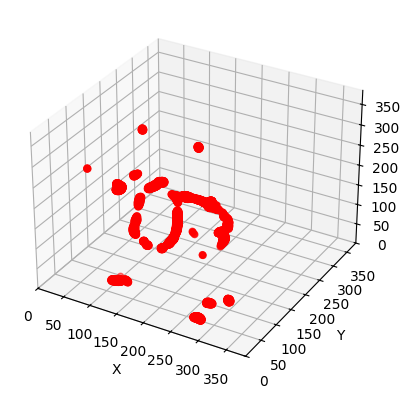

processing validation or test patient 18 / 40
(384, 384, 384)
dice scores: [np.float64(0.6411569623441501)]
overlap scores: [np.float64(0.8025116254630481)]


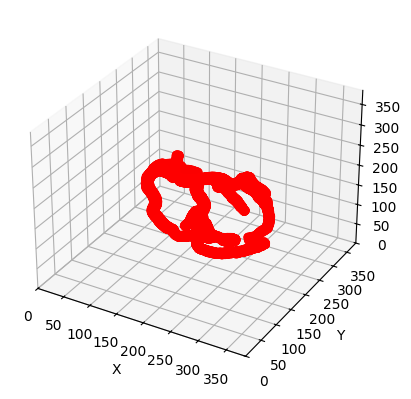

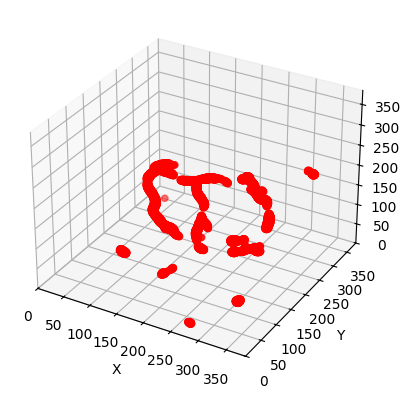

processing validation or test patient 19 / 40
(512, 512, 256)
dice scores: [np.float64(0.6706566134087167)]
overlap scores: [np.float64(0.8095100163366509)]


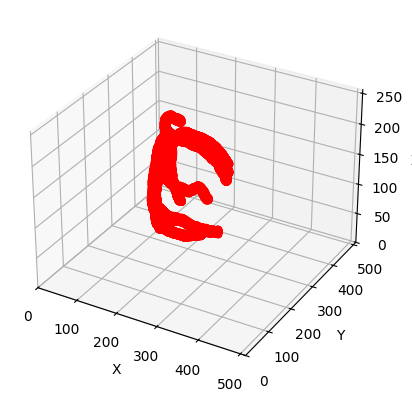

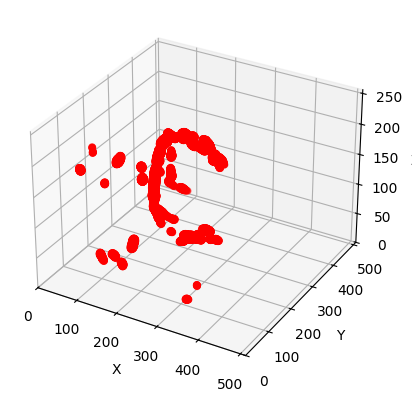

processing validation or test patient 20 / 40
(384, 384, 384)
dice scores: [np.float64(0.45818142390523564)]
overlap scores: [np.float64(0.6637216790356147)]


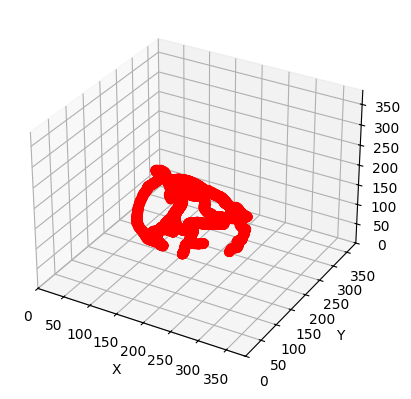

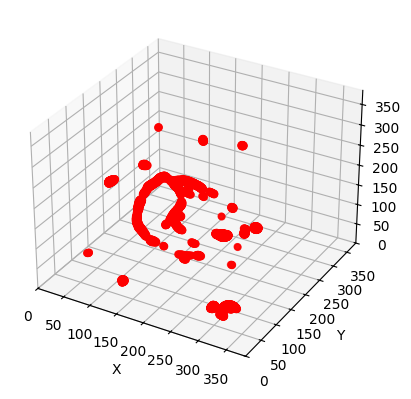

processing validation or test patient 21 / 40
(384, 384, 384)
dice scores: [np.float64(0.6146144617733668)]
overlap scores: [np.float64(0.7326598801305303)]


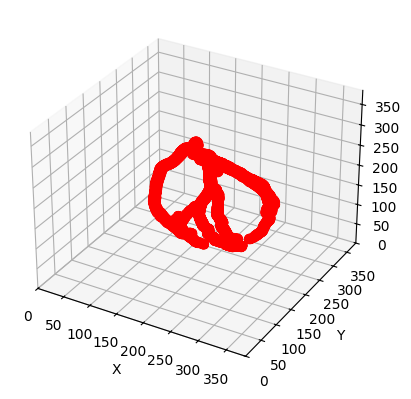

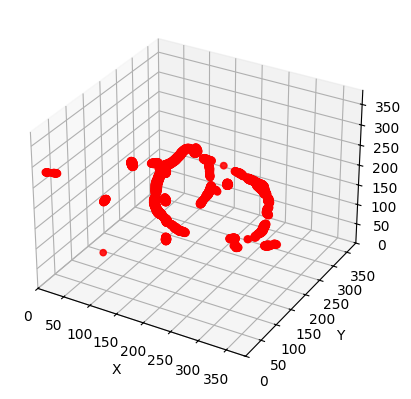

processing validation or test patient 22 / 40
(512, 512, 384)
dice scores: [np.float64(0.532859706356167)]
overlap scores: [np.float64(0.7147118176896196)]


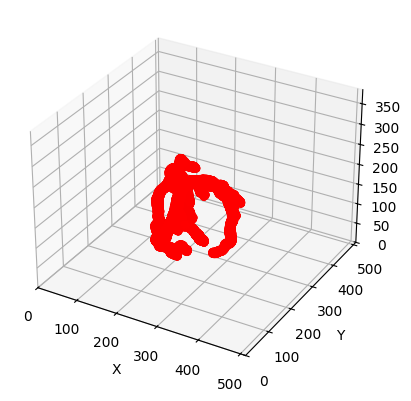

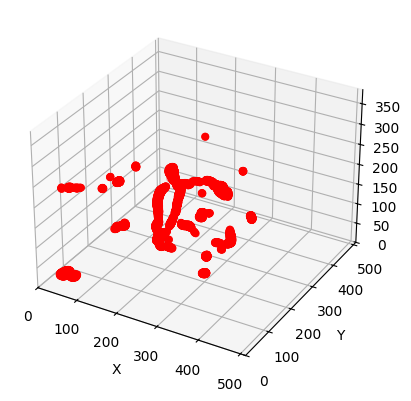

processing validation or test patient 23 / 40
(384, 384, 384)
dice scores: [np.float64(0.6039963385966007)]
overlap scores: [np.float64(0.8480029207740051)]


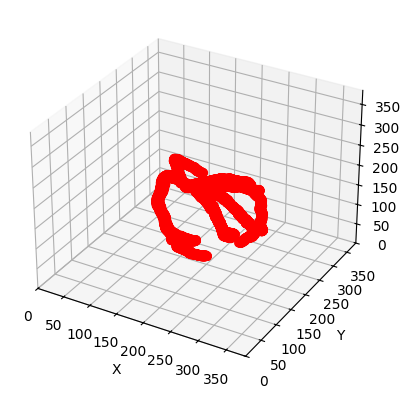

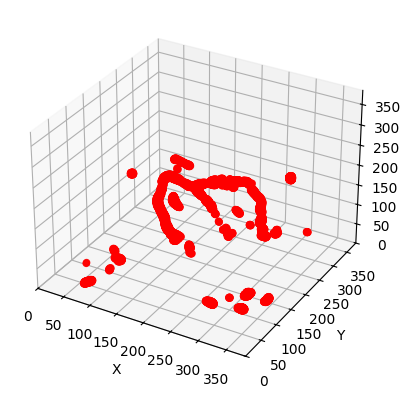

processing validation or test patient 24 / 40
(384, 384, 384)
dice scores: [np.float64(0.5615072642332769)]
overlap scores: [np.float64(0.6721482737853816)]


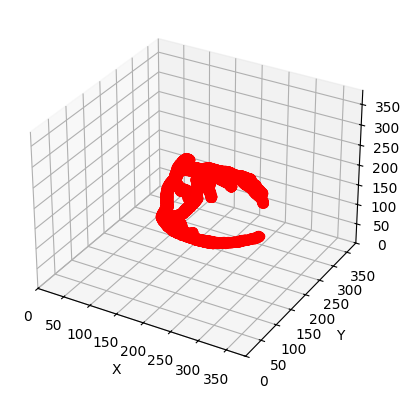

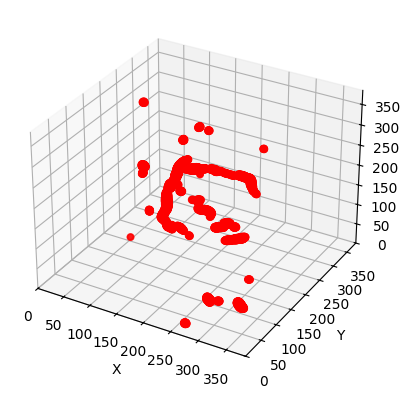

processing validation or test patient 25 / 40
(384, 384, 256)
dice scores: [np.float64(0.5389326880545364)]
overlap scores: [np.float64(0.7243656100495202)]


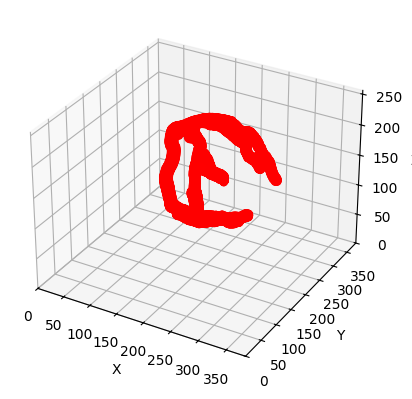

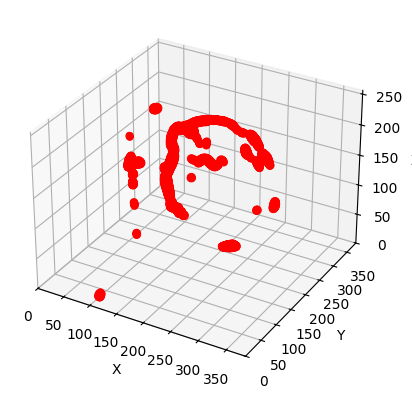

processing validation or test patient 26 / 40
(384, 384, 384)
dice scores: [np.float64(0.5392493907779572)]
overlap scores: [np.float64(0.7027518091747679)]


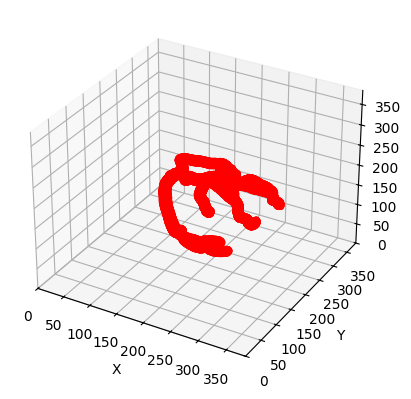

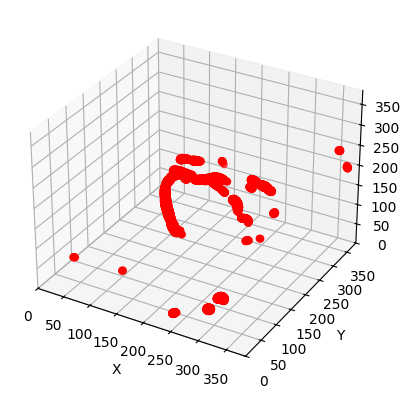

processing validation or test patient 27 / 40
(384, 384, 256)
dice scores: [np.float64(0.7053302257239126)]
overlap scores: [np.float64(0.8027419773376006)]


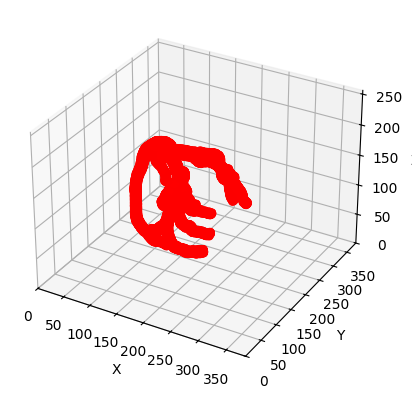

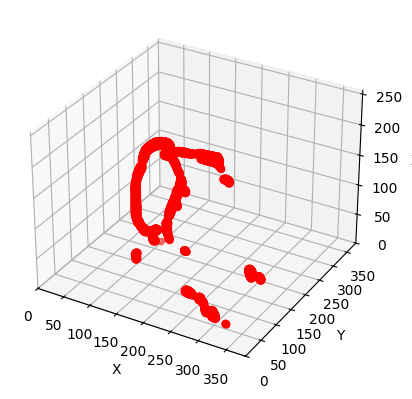

processing validation or test patient 28 / 40
(384, 384, 256)
dice scores: [np.float64(0.6362035490134104)]
overlap scores: [np.float64(0.7834161168359404)]


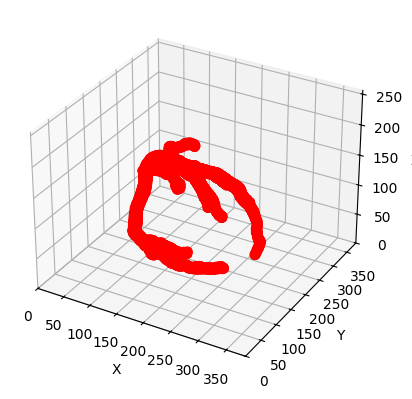

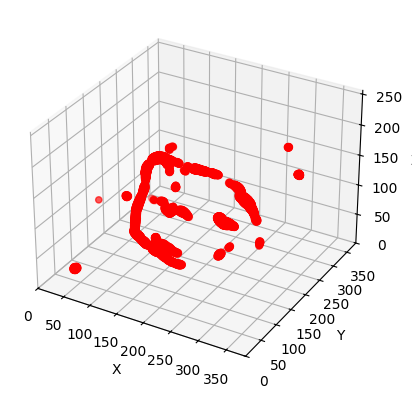

processing validation or test patient 29 / 40
(384, 384, 384)
dice scores: [np.float64(0.5770444182530329)]
overlap scores: [np.float64(0.8256818220533874)]


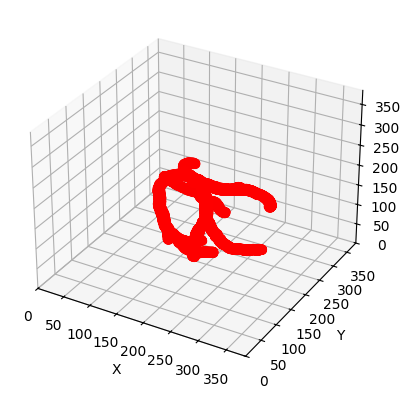

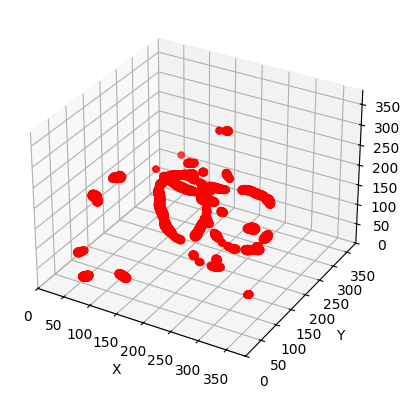

processing validation or test patient 30 / 40
(512, 512, 384)
dice scores: [np.float64(0.483866294511353)]
overlap scores: [np.float64(0.7247634753927611)]


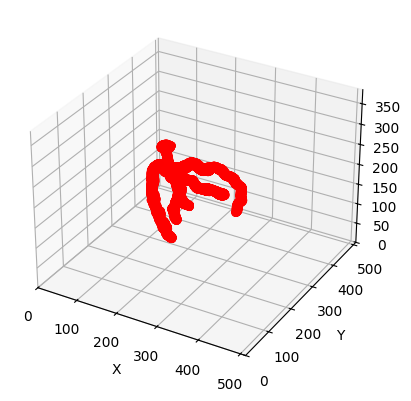

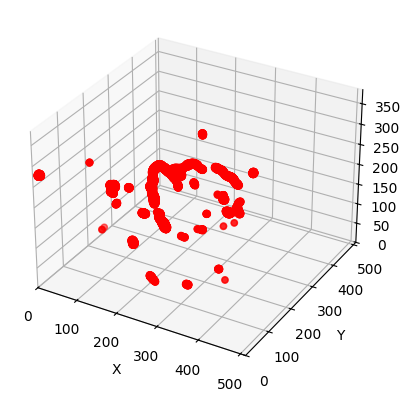

processing validation or test patient 31 / 40
(384, 384, 384)
dice scores: [np.float64(0.6597369954114929)]
overlap scores: [np.float64(0.868624713446059)]


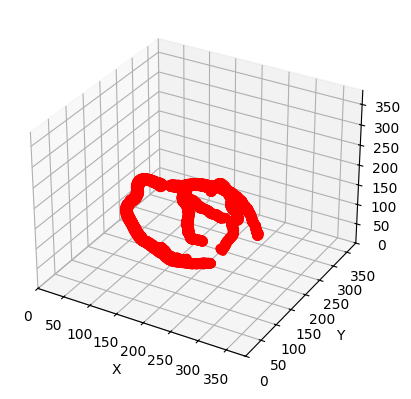

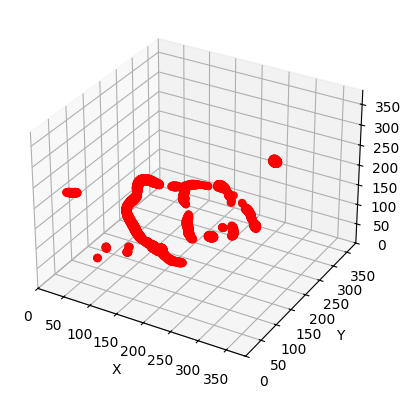

processing validation or test patient 32 / 40
(384, 384, 256)
dice scores: [np.float64(0.5897148134134532)]
overlap scores: [np.float64(0.8003969082932944)]


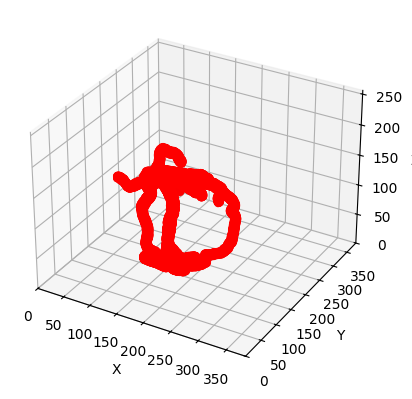

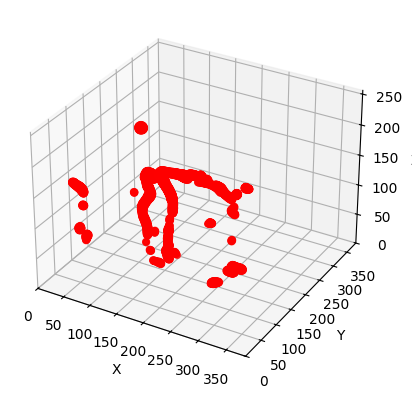

processing validation or test patient 33 / 40
(512, 512, 384)
dice scores: [np.float64(0.3394120995371116)]
overlap scores: [np.float64(0.7558175686987301)]


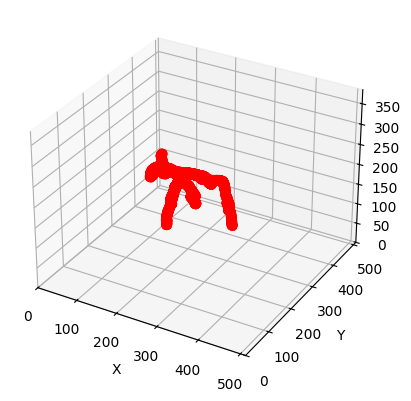

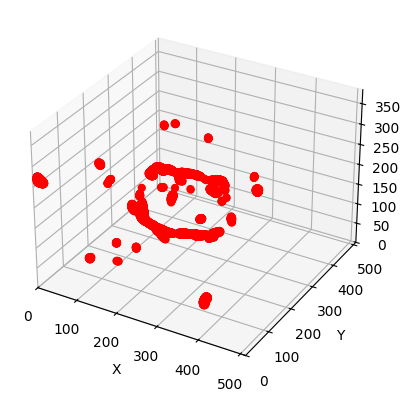

processing validation or test patient 34 / 40
(384, 384, 384)
dice scores: [np.float64(0.44992642140468225)]
overlap scores: [np.float64(0.8142947072780979)]


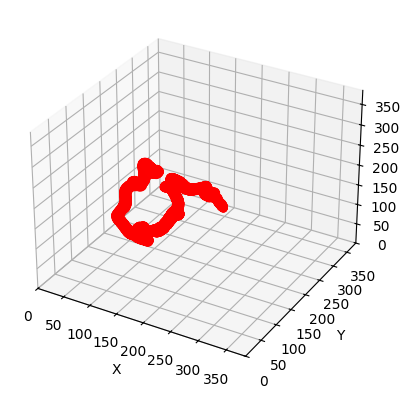

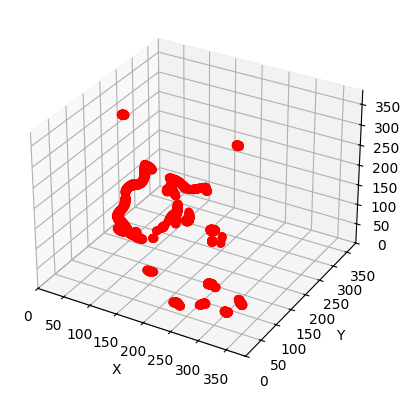

processing validation or test patient 35 / 40
(384, 384, 384)
dice scores: [np.float64(0.5420040742279744)]
overlap scores: [np.float64(0.7583092280642051)]


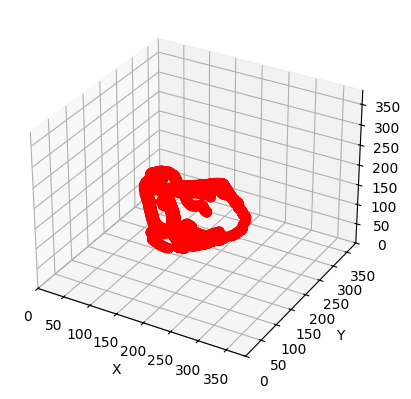

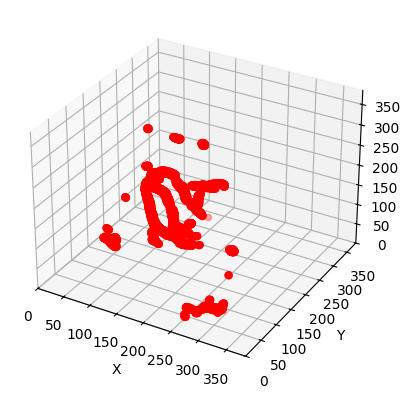

processing validation or test patient 36 / 40
(384, 384, 384)
dice scores: [np.float64(0.5079563600629808)]
overlap scores: [np.float64(0.7395941727367326)]


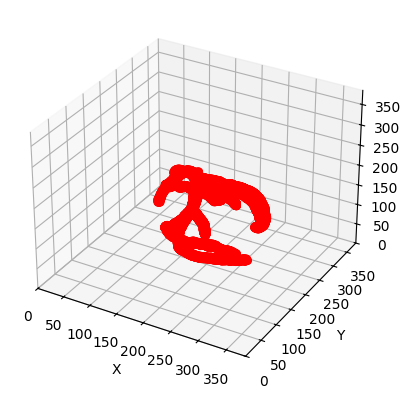

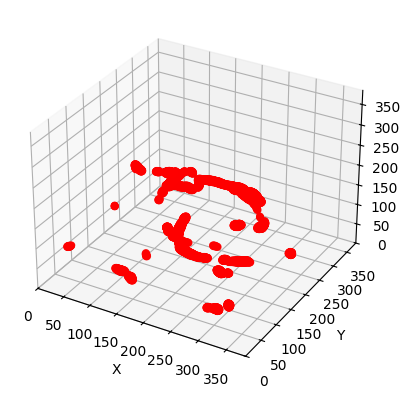

processing validation or test patient 37 / 40
(512, 512, 384)
dice scores: [np.float64(0.6233178775229005)]
overlap scores: [np.float64(0.8425870329751124)]


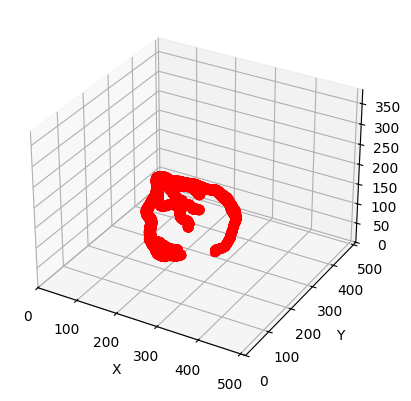

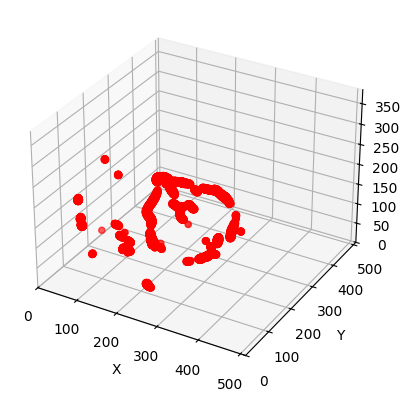

processing validation or test patient 38 / 40
(384, 384, 384)
dice scores: [np.float64(0.6375022937583559)]
overlap scores: [np.float64(0.8895993678850487)]


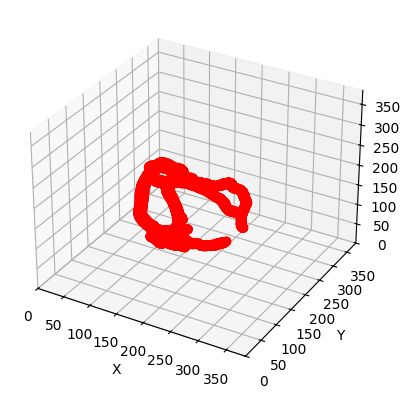

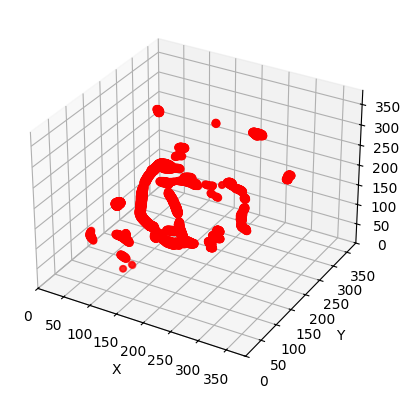

processing validation or test patient 39 / 40
(384, 384, 384)
dice scores: [np.float64(0.6448064435053511)]
overlap scores: [np.float64(0.7369370332268969)]


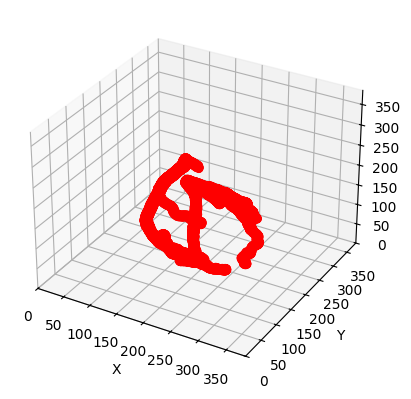

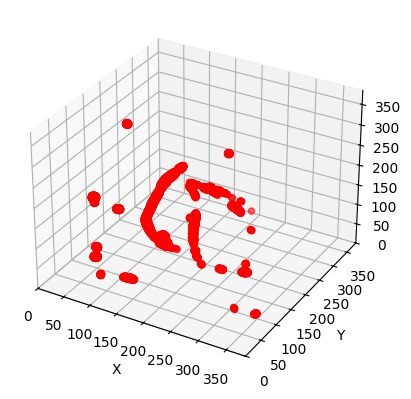

(np.float64(0.7880797979189735), np.float64(0.580480707198687))

In [23]:
test_or_validate_model(test_idxs_patches, model, visualize=True)